**Изучить и реализовать MLP (многослойная искусственная нейронная сеть) для классификации нелинейно разделимых данных.**

  

1. Сгенерируйте данные (любым методом из sklearn.datasets).

2. Визуализируйте данные на плоскости.

3. Создайте MLP: вход (2 нейрона), скрытый слой (4 нейрона, ReLU), выход (1 нейрон, sigmoid) - можете использовать pytorch / keras

4. Разделите данные (80% — обучение, 20% — тест).

5. Обучите на 1000 эпох, постройте график потерь.

6. Оцените точность на тесте.

7. * *Если увлеклись, можно реализовать MLP для решения XOR.*

Форма данных: X (1000, 2), y (1000,)
Классы: [0 1]


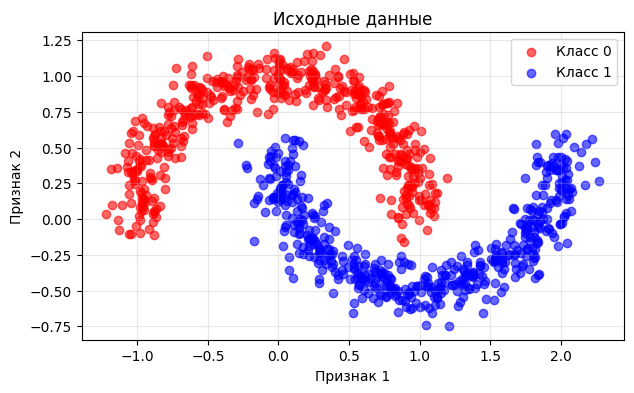

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

print(f"Форма данных: X {X.shape}, y {y.shape}")
print(f"Классы: {np.unique(y)}")

plt.figure(figsize=(7, 4))

plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Класс 0', alpha=0.6)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Класс 1', alpha=0.6)
plt.title('Исходные данные')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.grid(True, alpha=0.3)

In [67]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=4, stratify=y
)

history = model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2625 - loss: 1.0360 - val_accuracy: 0.2450 - val_loss: 1.0336
Epoch 2/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2637 - loss: 0.9933 - val_accuracy: 0.2500 - val_loss: 0.9905
Epoch 3/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2663 - loss: 0.9555 - val_accuracy: 0.2450 - val_loss: 0.9531
Epoch 4/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2700 - loss: 0.9229 - val_accuracy: 0.2350 - val_loss: 0.9198
Epoch 5/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2738 - loss: 0.8939 - val_accuracy: 0.2450 - val_loss: 0.8913
Epoch 6/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2887 - loss: 0.8690 - val_accuracy: 0.2600 - val_loss: 0.8651
Epoch 7/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2962 - loss: 0.8465 - val_accuracy: 0.2600 - val_loss: 0.8419
Epoch 8/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3038 - loss: 0.8264 - val_accuracy: 0.

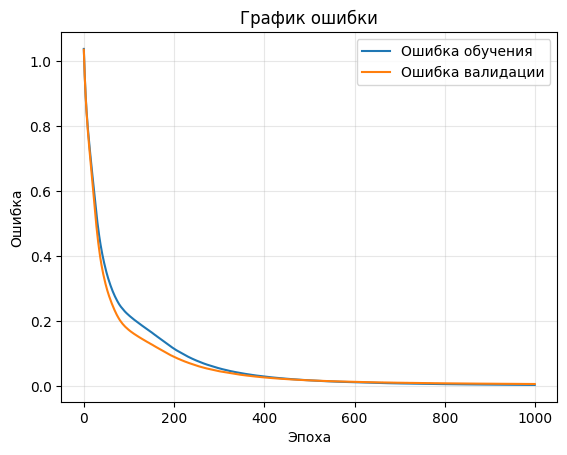

In [69]:
plt.plot(history.history['loss'], label='Ошибка обучения')
plt.plot(history.history['val_loss'], label='Ошибка валидации')
plt.title('График ошибки')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()
plt.grid(True, alpha=0.3)

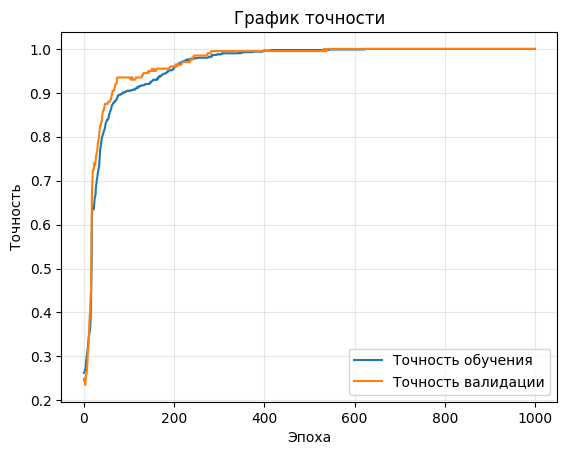

In [70]:
plt.plot(history.history['accuracy'], label='Точность обучения')
plt.plot(history.history['val_accuracy'], label='Точность валидации')
plt.title('График точности')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.grid(True, alpha=0.3)

In [71]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

Точность на тестовой выборке: 1.0000


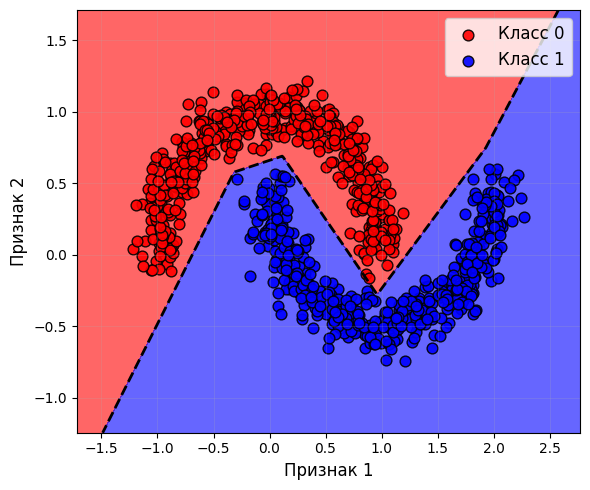

In [72]:
def plot_decision_boundary(model, X, y):
    
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()], verbose=0)
    Z = Z.reshape(xx.shape)
    
    colors = ['red', 'blue']
    cmap = plt.cm.colors.ListedColormap(colors)
    
    plt.figure(figsize=(6, 5))
    
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap=cmap, alpha=0.6)
    
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2, linestyles='--')
    
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Класс 0', 
                          alpha=0.9, edgecolors='black', s=60, linewidth=1)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Класс 1', 
                          alpha=0.9, edgecolors='black', s=60, linewidth=1)
    
    plt.xlabel('Признак 1', fontsize=12)
    plt.ylabel('Признак 2', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.2)
    
    plt.tight_layout()
    plt.show()

plot_decision_boundary(model, X, y)

# другой линейно неразделимый датасет чисто по приколу

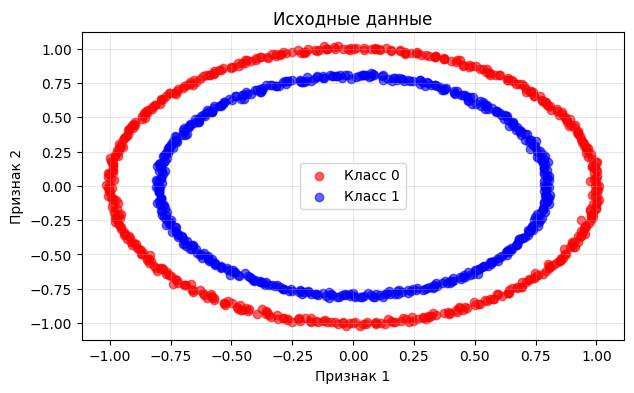

In [ ]:
X, y = make_circles(n_samples=1000, noise=0.01, random_state=4)

plt.figure(figsize=(7, 4))

plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Класс 0', alpha=0.6)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Класс 1', alpha=0.6)
plt.title('Исходные данные')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.grid(True, alpha=0.3)

c:\Users\Lenovo\Desktop\CodeShit\Jupyter\neurona4ki_4curse\hui\hui\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Точность на тестовой выборке: 0.9850


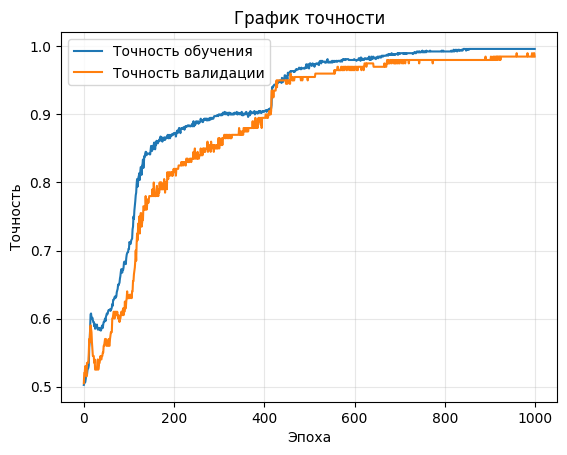

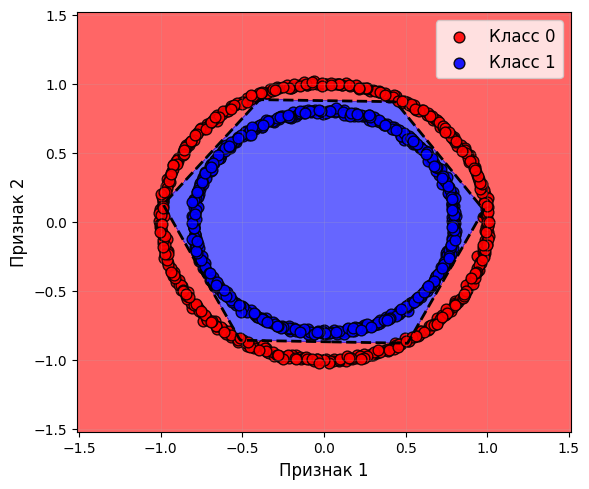

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=4, stratify=y
)

history = model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=0
)

plt.plot(history.history['accuracy'], label='Точность обучения')
plt.plot(history.history['val_accuracy'], label='Точность валидации')
plt.title('График точности')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.grid(True, alpha=0.3)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

plot_decision_boundary(model, X, y)

весьма неожиданно лол